In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from tbats import TBATS, BATS
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal, fftpack
import seaborn as sns
plt.style.use('seaborn')

In [4]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [11]:
#read data
df = pd.read_csv(r'C:\Users\I539797\Documents\Thesis\Datasets\Formatted Datasets\formatted_stockholm.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df.head()

,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
Date,,,,,,,
2016-01-02,564797,655,1183,454,280,734,Saturday
2016-01-02,564681,655,592,292,195,435,Saturday
2016-01-02,564680,655,591,428,316,579,Saturday
2016-01-02,564679,655,590,352,262,471,Saturday
2016-01-02,564678,655,588,287,191,431,Saturday


In [12]:
y = pd.DataFrame(df.groupby('Date')['MeanTravelTimeSeconds'].mean()[:-90])
y.tail()
# y.to_csv('final_washingtondc.csv')

,MeanTravelTimeSeconds
Date,
2019-12-28,622.703093
2019-12-29,639.410148
2019-12-30,577.524496
2019-12-31,661.316456
2020-01-01,854.936660


Text(0, 0.5, 'Travel Time in Seconds')

<Figure size 9600x6600 with 0 Axes>

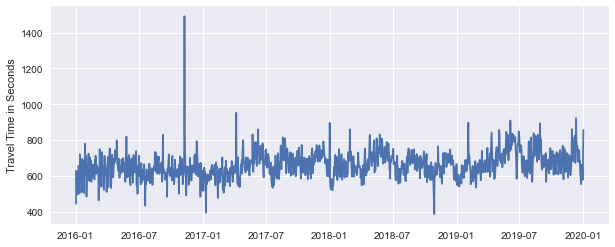

In [13]:
plt.figure(dpi=1200)
plt.figure(figsize=(10,4))
plt.plot(y)
plt.title('', fontsize=20)
plt.ylabel('Travel Time in Seconds')

# Welch's Method to Determine Seasonality Terms

730
1459


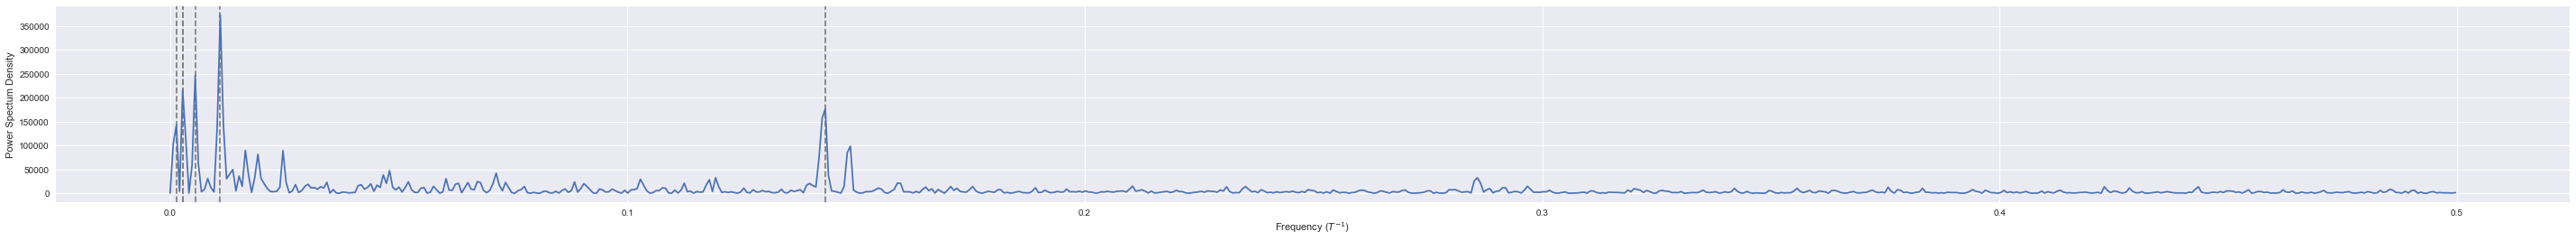

0
16
[643 376 594 719 505  54 370 229 720 483 717 508 572 474 384 684 452 664
 403 571 447 247 259 117 578 583 513 456 110 136 115 181 406 118 397 529
 458   6 616 678 442 325 550 613 566  86 160  82 446 396 153 268 220 630
 405 144 623 595 712 167 679 564 650 631   0 124 534 146 670  51 214 448
 661 703 700 507 555 368 443 509 431 598 556 671 697 484 607 535 714 502
 728 494 295 162 244 135 389 501 473 672 515 464 640 122 274 590 324 682
 296 696 641 596 312 415 159 339  53 689 449 314 237 649 427 632 539  57
 398 642 266 547 373 727 608 690 562 506 352 698 704 512  38 422 681 723
 121 273 725 538 635 504 588 221 341 197 601 582 605 614 281 565 185 628
 495 315 239 457 726 114 516 627 485 581 573 606 269 693 517 360 487 593
 685 350 202  93 653 612 481 109 639 399 193 463 347 563 366 729 192 521
 272 545 354 326 622 688 228 385 407 101 196 533 525 651 586 711 154 258
  58 600 673 491 340 619 479 570 655 540 569 665 514 609 180 497 450 377
 568 724 584 480 462 383 486 553 692 455 319  

In [19]:
f,pxx = signal.welch(y.values.flatten(), fs=1, nperseg=len(y))
print(len(f))
print(len(y))

freqs = [1/91.1875, 1/182.375, 1/357.25, 1/364.75, 1/6.980861244019138, 1/729.5]


fig, ax = plt.subplots(figsize=(50, 4))
for freq in freqs:
    plt.axvline(x=freq, c='grey', linestyle='dashed')
ax.set_xlabel('Frequency ($T^{-1}$)')
ax.set_ylabel('Power Spectum Density')
plt.plot(f, pxx)

plt.show()
    
print(np.sqrt(pxx.max()).argmax())
print(pxx.argmax())
print(pxx.argsort()[0:])
print(1/f[16])
print(1/f[8])
print(1/f[4])
print(1/f[209])
print(1/f[208])
print(1/f[2])

In [72]:
y_to_train = y.iloc[:(len(y))]
y_to_test = y.iloc[(len(y)-365):]

# Fourier Transform to Determine Seasonality Terms

[]

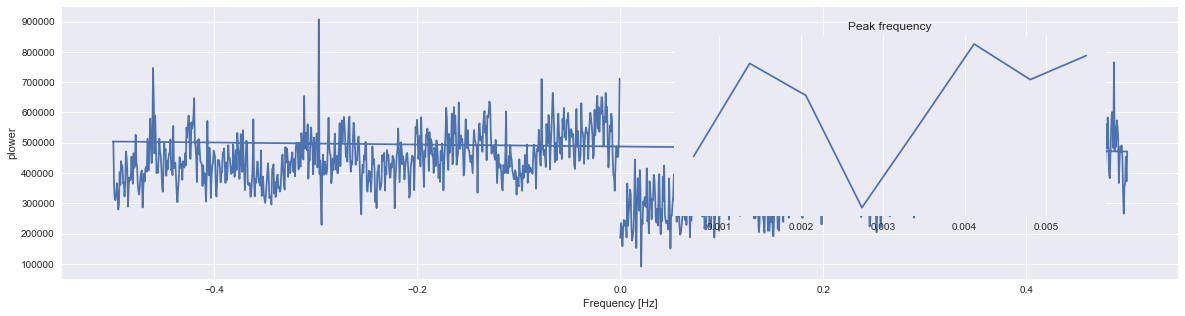

In [93]:
# # Frequency and sampling rate
# f = 10 # frequency
# Fs = 100 # sampling rate
# t = np.arange(0,1,1/Fs)
# # # Sine function
# y = np.sin(2 * np.pi * f * t)
# # Perform Fourier transform using scipy
# from scipy import fftpack
# y_fft = fftpack.fft(y)
# # Plot data
# n = np.size(t)
# fr = Fs/2 * np.linspace(0,1,n/2)
# y_m = 2/n * abs(y_fft[0:np.size(fr)])
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# ax[0].plot(t, y)    # plot time series
# ax[1].stem(fr, y_m) # plot freq domain

# y_fft = fftpack.fft(y.values.flatten())

# amplitude = np.abs(y_fft)
# power = amplitude**2
# angle = np.angle(y_fft)

# sample_freq = fftpack.fftfreq(y.size, 1)

# amp_freq = np.array([amplitude, sample_freq])

# amp_position = amp_freq[1,:].argmax()

# peak_freq =  amp_freq[1, amp_position]

# plt.plot(amplitude, amp_freq.T)

# print(amp_position)
# print(peak_freq)

# The FFT of the signal
sig_fft = fftpack.fft(y)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(y.size, d=1)

# Plot the FFT power
plt.figure(figsize=(20, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./1426.)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

## TBATS

In [139]:
# Fit the model
estimator = TBATS(seasonal_periods=(7.004901960784315, 30.404255319148938, 357.25)) # Best so far: (7, 30.5, 91.3, 365) and (7, 75 (???), 365)
model = estimator.fit(y_to_train)

# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

In [140]:
print(model.summary())

Use Box-Cox: True
Use trend: False
Use damped trend: False
Seasonal periods: [  7.00490196  30.40425532 357.25      ]
Seasonal harmonics [3 1 2]
ARMA errors (p, q): (3, 2)
Box-Cox Lambda 0.320333
Smoothing (Alpha): 0.021207
Seasonal Parameters (Gamma): [-1.57219956e-05 -1.61280056e-04  1.30804222e-05  2.99888838e-05
  5.85886213e-05 -7.52105835e-05]
AR coefficients [ 2.99888838e-05  5.85886213e-05 -7.52105835e-05]
MA coefficients [0.37626538 0.16883174]
Seed vector [21.70387761 -0.25029401 -0.07792918 -0.04142265  0.03606167  0.02768809
  0.0726636  -0.10991281  0.06510681 -0.33038802 -0.17091395 -0.05135867
 -0.0897134   0.          0.          0.          0.          0.        ]

AIC 22213.792944


In [141]:
#get the predictions and residuals
predictions = pd.Series(y_forecast, index=y_to_test.index)
residuals = y_to_test - predictions

Text(0, 0.5, 'Seconds')

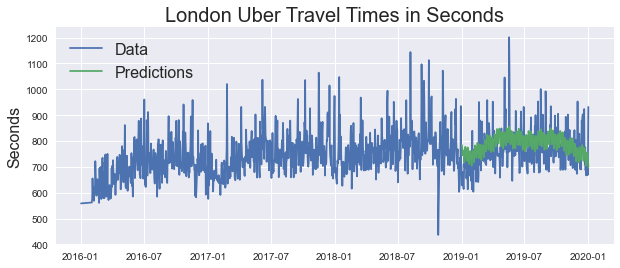

In [142]:
plt.figure(figsize=(10,4))

plt.plot(y)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('London Uber Travel Times in Seconds', fontsize=20)
plt.ylabel('Seconds', fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [143]:
# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_to_test, predictions): 
    y_to_test, predictions = np.array(y_to_test), np.array(predictions)
    return np.mean(np.abs((predictions - y_to_test)/y_to_test)) * 100

mean_absolute_percentage_error(y_to_test, predictions)

8.65876475921452

In [144]:
# Root Mean Square Error (RMSE)
def rmse(y_to_test, predictions):
    y_to_test, predictions = np.array(y_to_test), np.array(predictions)
    return np.sqrt(np.mean((predictions - y_to_test)**2))

rmse(y_to_test, predictions)

84.48681226109089

c:\users\i539797\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


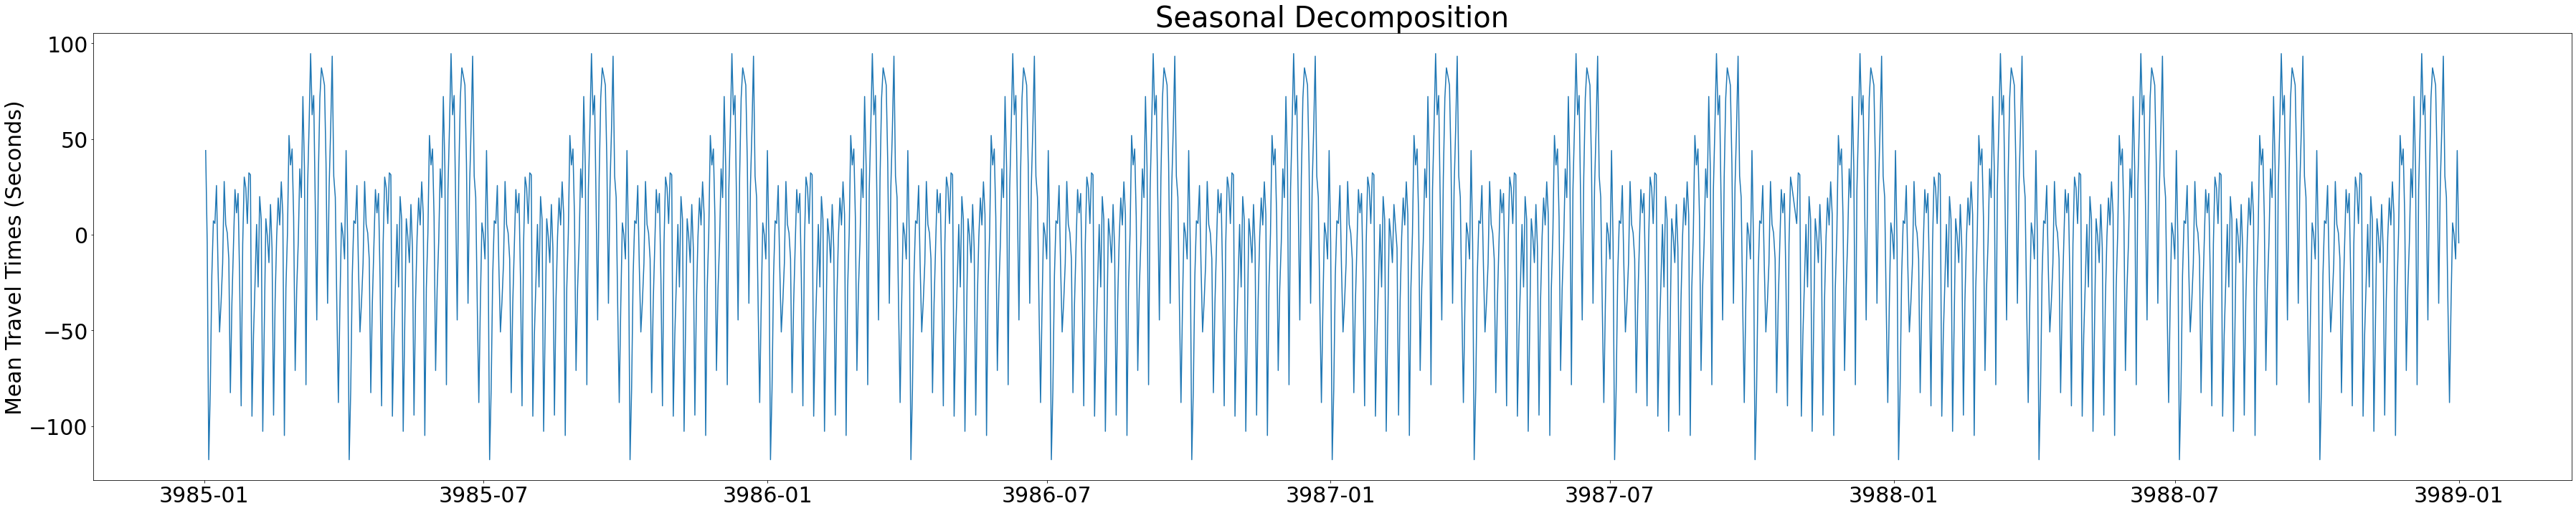

In [109]:
# Plotting trend, seasonality and residuals
decomposition = seasonal_decompose(y, model='additive', period=91)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, ax1 = plt.subplots(1, figsize=(50,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

ax1.plot(y.index.unique(), seasonal)
ax1.set_title("Seasonal Decomposition", fontsize=40)
ax1.set_ylabel("Mean Travel Times (Seconds)", fontsize=30)

# ax2.plot(y.index.unique(), seasonal)
# ax2.set_title("Seasonal", fontsize=40)

# ax3.plot(y.index.unique(), residual)
# ax3.set_title("Residual", fontsize=40)

fig.tight_layout()
plt.show()

In [88]:
y_saved = y.to_csv('grouped_london.csv')